# Aviser

Aviser skiller seg litt fra bøker ved at de utkommer daglig, sånn at datoer er en viktig del i konkordanser og kollokasjoner.

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations', overwrite=True)
import collocations as col
import dhlab.graph_networkx_louvain as gnl
from IPython.display import HTML
mu.css()

Updated file `D:\documents\GitHub\Miscellaneous-Notebooks\collocations.py`

## Referansedata

frekvenslisten for de 50000 meste frekvente i Bokhylla bøker.

In [2]:
tot = nb.frame(nb.totals(50000), 'tot')
nb.normalize_corpus_dataframe(tot)

True

# Konkordanser

In [3]:
nb.concordance(word='Kolera', corpus='avis', title='%', before=12, after=12, yearfrom=1852, yearto=1854, size=100)

dennorskerigstidende-18540906,"( jer . Desuden » older de » Grad , i hvilken",Kolera,"griber em sig , megen © fræf blandt Soldaterne . Maaslee kunde"
dennorskerigstidende-18530907,Regjerings Departement for det Indre den 25 de October 1848. Den ondartede,Kolera,"begynder enten pludselig med stor Heftighed , eller efter forudgaaende . Ildebefindende"
dennorskerigstidende-18530907,"en passende Behandling , eller øpergaa til den sande kolera . Selve",Kolera,giver sig tilkjende ved Brakninger af en tynd Vcrdsie og tynde hyppige
dennorskerigstidende-18530907,er gavnligt at anlægge et uldent Bcrlte . Selv efterat ben egentlige,Kolera,"er opl ; ørt , indtrcede ofte heftige Eftersygdomme , som ogsaa"
morgenbladet-18520719,"Dzierzon mellem den ondartede og godartede Sygdom , ligesom Tilfceldet er med",Kolera,", idet han ansecr den Smitte , der angriber den udeerledc Ungel"
morgenbladet-18521121,Dsd og som ikke efterlader nogeu Tvivl om Tilværelsen af dcu asiatiske,Kolera,samt om yderligere Tiltagende af deuuc Sygdo ' ii . Gler ankrede
morgenbladet-18521216,men i Kankasus-Armcen har der fundet mange Avaneemcntcr og Ordens-Uddelinger Sted .,Kolera,tiltager i Petersburg . Amerika . Fra Amerika har man Efterretning om
morgenbladet-18520810,"paa I — 2 Maancder , hvis de afholde rcligiose Forsamlinger ,",Kolera,er nu fra Polen kommen til Danzig . Efter en Korrespondance fra
morgenbladet-18520916,spanske Kirkers og Klosteres Kostbarheder nok snart finde Anvendelse . Tydsklnnd .,Kolera,er fremdeles meget stem i Posen . Den 6 te Sept .
morgenbladet-18520918,med 16 mer . Den posentske Landdags Sammentrcrdcn er paa Grund af,Kolera,bleven udsat til der 19 de ds. I Indenrigsministeriet bestjcrftiger man sig
morgenbladet-18520527,som havde Norske og Svenske i Logis ; men ogsaa did trcrngte,Kolera,", Bull maatte forlade Huset , og vankede paany om uden en"


In [10]:
import requests
data =  requests.get(
        "https://api.nb.no/ngram/konknewspaper", 
        params={
            'word':'Kolera',
            'yearfrom':"1853-01-01", 
            'before':10,
            'after':10,
            'size':100,
            'yearto':"1890-03-01",
            'title':"%"}
        )

In [19]:
HTML(nb.konk_to_html(col.conc_newspaper('Kolera', datefrom="1853-01-01", dateto = "1890-03-01", size=20)))

https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880602_29_333_3,mtiliflt forn cm der bnr,Kolera,i 85 tK ' t
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880608_29_347_1,"Varsaker , 9 iaaftab ,",Kolera,", IjuMing , Slafltma ,"
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18881012_29_621_2,"er forhoiet , ligefom at",Kolera,eg andre Sygdomme t disse
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18881021_29_645_2,om hvis Batclnlltlo » mod,Kolera,vott Blad i fin Tid
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18881021_29_645_2,en fubfutant Inbspreitnllig af forlynbet,Kolera,» Virus . lneoenS Russeren
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18881110_29_689_1,ett Methode til Indpodnlng Imob,Kolera,", er fornylig relft fra"
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880128_29_54_1,be cpibciniste © ygbomme (,Kolera,f . Gr . optroobte
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880218_29_101_1,"A > u , dc",Kolera,", Dysenteri og Dod i"
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880302_29_130_2,". nreuutc Tilfrelbc , snasom",Kolera,", bcr uilbc bcu af"
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880726_29_447_1,] røebføbt Suaghed 4 Inbenlandsk,Kolera,1 l Andre Dodsaar »
https://www.nb.no/items/URN:NBN:no-nb_digavis_aftenposten_null_null_18880830_29_515_3,medcnS f . Ex .,Kolera,fbceffer Angreb af Lungebetcendelse og


In [17]:
col.conc_avis??

## Kollokasjon

In [32]:
kollokasjon = col.coll_avis('influensa', datefrom="1994-01-01", dateto = "1994-03-01")


In [33]:
nb.normalize_corpus_dataframe(kollokasjon)

True

## Sammenlign med referanse

In [34]:
nb.frame_sort(nb.frame(kollokasjon[0]/tot.tot)).head(20)

,0
forkjølelse,2015.926922
pådratt,1066.127369
knekket,1035.966011
utøvere,997.792156
epidemier,899.198272
snikende,840.381620
Atkinson,819.745124
pådra,728.034151
slitt,724.965576
hemmet,669.463576


# Unigram 

Litt mer data enn på nb ngram

In [51]:
at = col.unigram('Kolera', name='aftenposten', period=(1850, 1890), media='avis')

In [52]:
bt = col.unigram('Kolera', name='morgenbladet', period=(1850, 1890), media='avis')

In [55]:
import pandas as pd

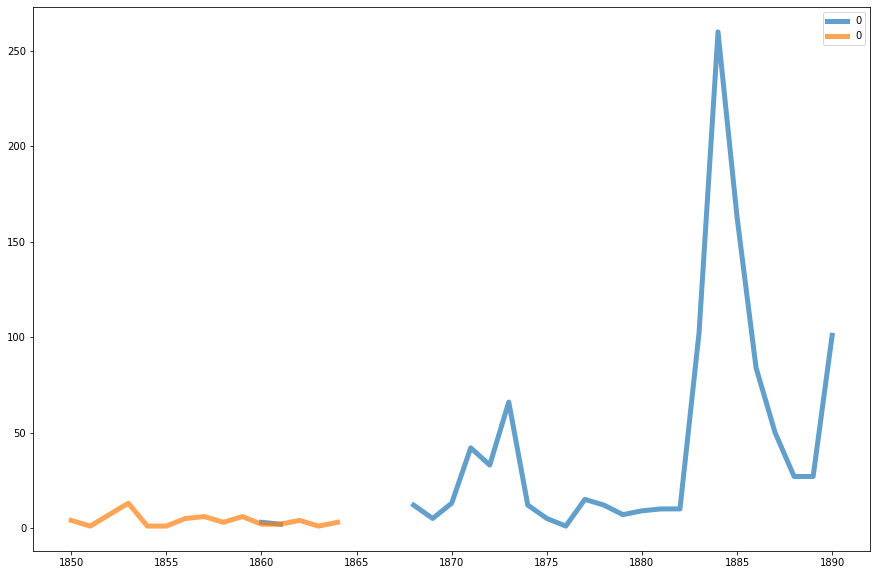

In [57]:
pd.concat([at, bt], sort=False, axis=1).plot(lw=5, alpha=0.7)

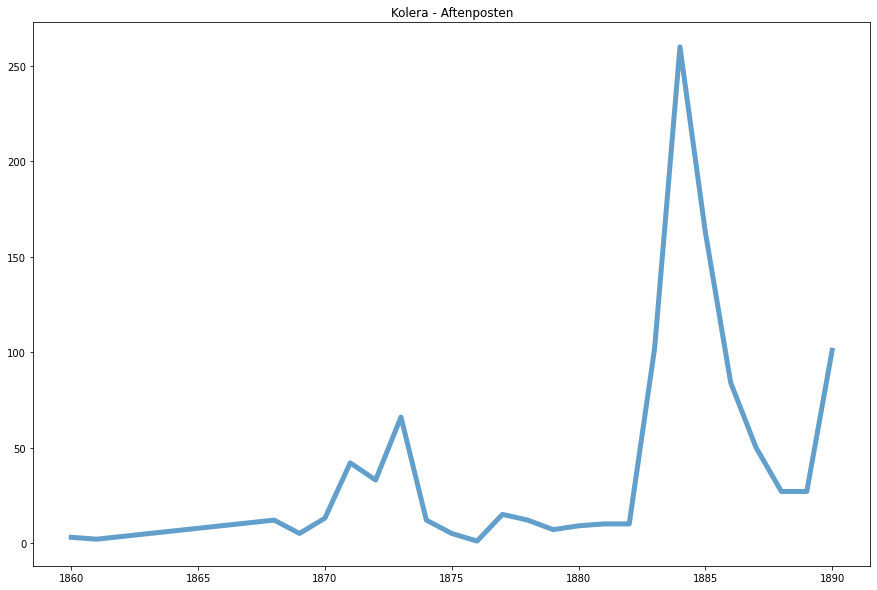

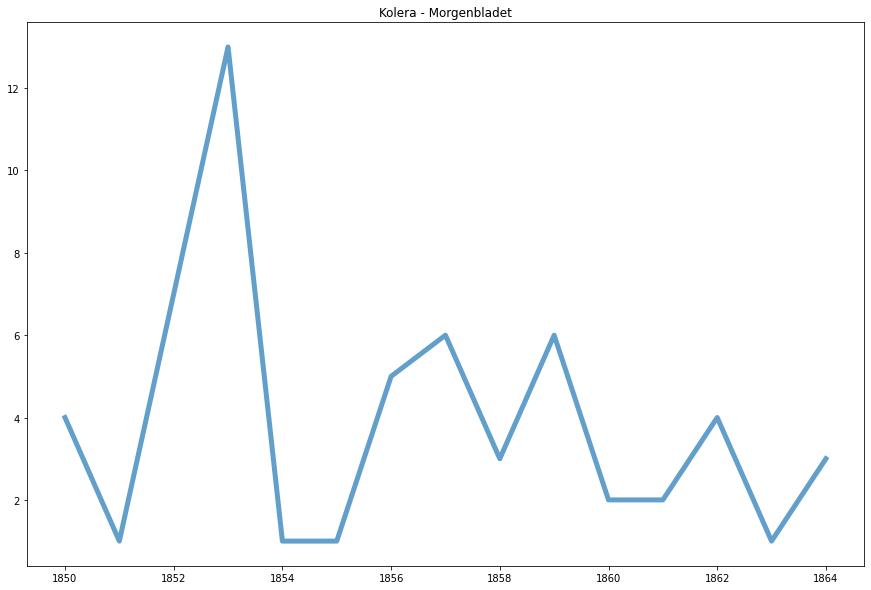

In [53]:
at.plot(lw=5, alpha=0.7, legend=False, title='Kolera - Aftenposten')
bt.plot(lw=5, alpha=0.7, legend=False, title='Kolera - Morgenbladet')

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)